In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("intro_2.ipynb")

In [3]:
# Run this cell first, then restart the kernel
%pip install ase
%pip install abtem
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
import ase
import abtem

# HW 2: Introductory Python Part 2

| Question  | Points |
|---|---|
| 1a  | 1  | 
| 1b | 3  |
| 1c  | 1  |
| 1d | 5 |
| 4 | 10 |

## Learning Goals: Plotting, Loops, and Functions

In this next introductory assignment we will take a look at a visualization package called `matplotlib`, look at the usages of loops in Python, and functions. This assignment will (hopefully) go relatively quick, as the aim is just to give you some familiarity. And in lieu of plotting line plots, going over examples of while/for loops, and filling in generic functions. We'll instead look at something you may be tasked with in research.

Here are some useful links:

- https://numpy.org/doc/stable/index.html
- https://matplotlib.org/


# Problem Statement

**Tomography** in microscopy is a technique of generating a 3D volume by *tilting* a sample about an axis. For every tilt, we take a 2D image to reconstruct. An example below is a tomographic reconstruction of a nanocube using a transmission electron microscope (TEM):

<div style="text-align: center;">
    <img src="Electron_tomography_of_nanocubes_visualized_with_tomviz.gif" width="500">
</div>

A much more common example would be CT scan, but instead of your sample rotating, the X-rays rotate about a person's body.

Here's the problem:

```
Your research advisor at the National Center for Electron Microscopy at LBNL gives you simulated data of a cube nanoparticle. They ask you to simulate a tomography dataset, so that you can compare a simulated and experimental reconstruction of the nanoparticle
```




Below is code of how we construct our FCC gold nanoparticle. Feel free to change it, but when you submit please retain the original parameters.


In [24]:
from ase.cluster.cubic import FaceCenteredCubic
import ase.visualize

surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
layers = [6, 9, 5]
lc = 4.078
nanoparticle = FaceCenteredCubic('Au', surfaces, layers, latticeconstant=lc)
nanoparticle.set_cell([30, 30, 30])
nanoparticle.center()
print(nanoparticle.get_center_of_mass())
ase.visualize.view(nanoparticle, viewer = 'x3d') # Uncomment to view particle

[15. 15. 15.]


### Part a)

While we can visualize the structure of our nanoparticle, what we're more interested in is what are the *atomic coordinates* of each atom. To get a better visualization we will use `plt.scatter` to show a 3D point cloud of our nanoparticle.

Below is a simple example of the usage of `matplotlib`'s `scatter` function using `plt.subplots`:

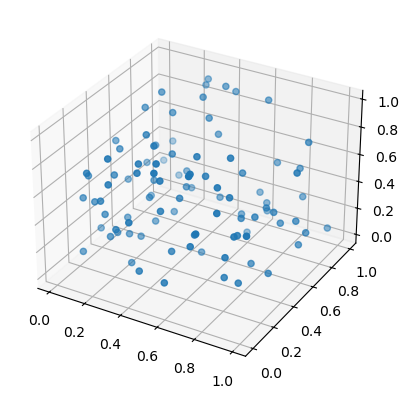

In [13]:
coordinates = np.random.random((3, 100)) # Defines an array with 3 rows, and 100 columns with random values (0, 1).

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(coordinates[0], coordinates[1], coordinates[2])

plt.show()

Plot the nanoparticle using the example code shown above. The positions of the nanoparticle is defined for you, using `nanoparticle.positions`. 

*Hint: how would you slice to get the $x$, $y$, and $z$ values?*

*Note: This problem is also manually graded for testing purposes. Please make sure you made a 3D scatter plot like the example above.*

<!-- BEGIN QUESTION -->



First 10 atom positions: 
 [[ 2.766  8.883 12.961]
 [ 4.805  6.844 12.961]
 [ 4.805  8.883 10.922]
 [ 2.766  8.883 17.039]
 [ 4.805  6.844 17.039]
 [ 4.805  8.883 15.   ]
 [ 4.805  8.883 19.078]
 [ 2.766 12.961  8.883]
 [ 4.805 10.922  8.883]
 [ 4.805 12.961  6.844]]


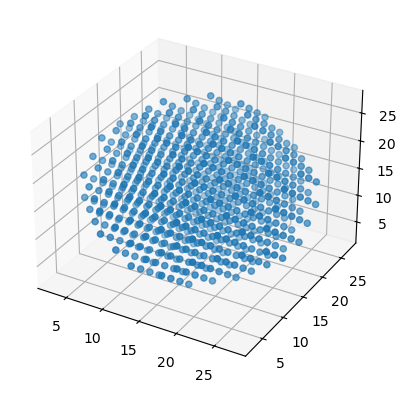

In [40]:
np_positions = nanoparticle.positions

print("First 10 atom positions: \n", np_positions[:10])

x = np_positions[:,0]
y = np_positions[:,1]
z = np_positions[:,2]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x, y, z)

plt.show()

In [42]:
grader.check("q1a")

q1a results: All test cases passed!

<!-- END QUESTION -->

We will now develop a way where we can *tilt* our sample. Since in TEM data we always have a top-down view of our data (i.e looking from frame of the z-axis), so we will **tilt over the y-axis**. Below is an example of tilting the nanoparticle 20 degrees, and 45 degrees.

We will use `abtem`'s built-in visualization of atoms to show a x-y view of our nanoparticle.

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Tilted 45 Degrees'}, xlabel='x [Å]', ylabel='y [Å]'>)

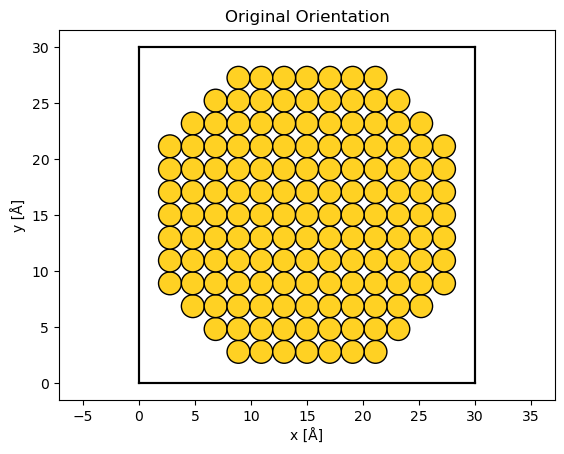

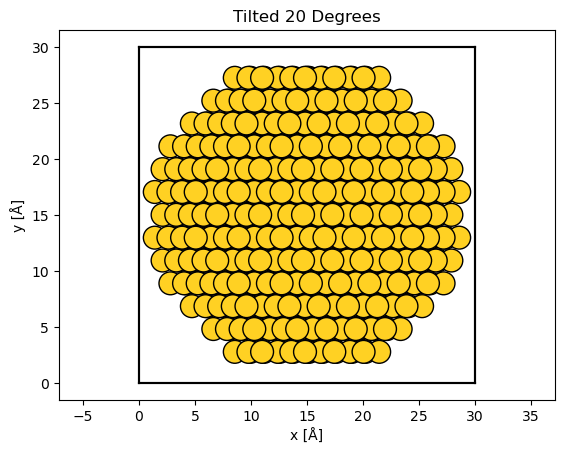

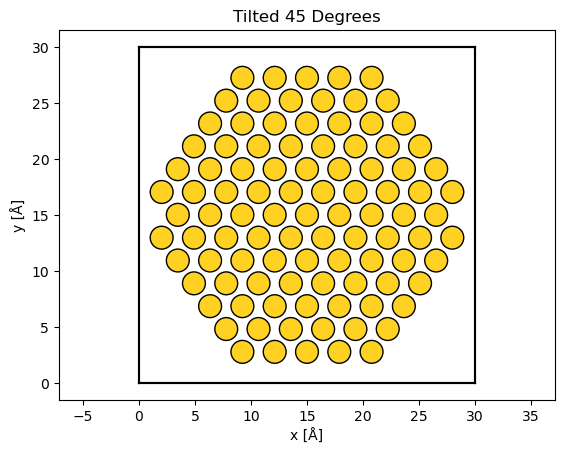

In [44]:
rot_test = nanoparticle.copy()
abtem.show_atoms(rot_test, title="Original Orientation")
rot_test.rotate(20, 'y', center = (15, 15, 15))
abtem.show_atoms(rot_test, title="Tilted 20 Degrees")
rot_test.rotate(25, 'y', center = (15,15,15))
abtem.show_atoms(rot_test, title="Tilted 45 Degrees")

Note that the rotations are **cumulative**, i.e rotating the particle once will change the state of the variable `nanoparticle`.

Since it's not really realistic to take an image of the atomic coordinates, we will use the **function** `ase_to_potential` which is implemented for you to give a [projected potential](https://abtem.readthedocs.io/en/latest/reference/api/_autosummary/abtem.potentials.iam.Potential.html) image of a nanoparticle. Functions in `python` are exactly in math i.e, you have an input $x$ that you pass into a function, $f(x)$, which returns a value. Python functions have the general syntax:

In [46]:
def my_func(x): # Has an input x
    
    result = x**2
    
    return result

print(my_func(2))

4


### part b)

For the next problem, we will implement a function that transforms our nanoparticle into a projected potential. Read the documentation of [`abtem.Potential`](https://abtem.readthedocs.io/en/latest/reference/api/_autosummary/abtem.potentials.iam.Potential.html), and define `potential`.

Use the parameters:
- parametrization: "kirkland"
- projection: "infinite"
- sampling = 0.25
- slice_thickness = 0.25

<!-- BEGIN QUESTION -->



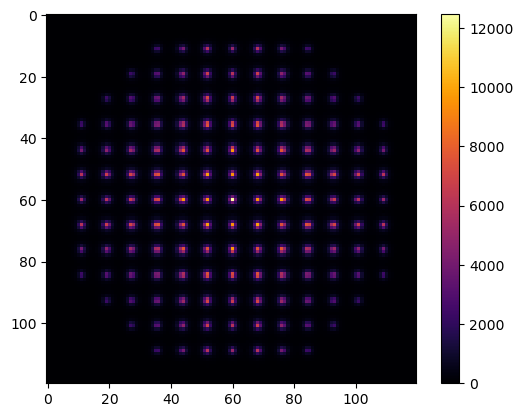

In [53]:
def ase_to_potential(np_sys):
    
    potential = abtem.Potential(atoms=np_sys, gpts=None, sampling=0.25, slice_thickness=0.25, parametrization='kirkland', projection='infinite', exit_planes=None, plane='xy', origin=(0.0, 0.0, 0.0), box=None, periodic=True, integrator=None, device=None)
    
    potentialArray = potential.build()
    
    return np.transpose(potentialArray.array.compute().sum(axis = 0))

test = ase_to_potential(nanoparticle)

plt.figure()
plt.imshow(test, cmap = "inferno")
plt.colorbar()

In [55]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- END QUESTION -->

Note that what **we want is to get a 2D image per-tilt**. This problem neccesitates the use of a `for`-loop, as we need to repeat taking a 2D image per tilt. Below are examples of usages of a `for`-loop:

In [58]:
my_nums = np.arange(0, 10) # Generates a numpy array of values going from 0 to 9 (arange is not inclusive)

print("General for-loop")
for i in range(len(my_nums)): # We need to pass an integer value of how long our list is to range.
    print(my_nums[i]) # Access each value in my_nums by indexing.

print("Pythonic for-loop")
for num in my_nums: # Iterates over each element in my_nums without indexing.
    print(num) # Gives the number directly without indexing.

General for-loop
0
1
2
3
4
5
6
7
8
9
Pythonic for-loop
0
1
2
3
4
5
6
7
8
9


So within our for-loop we want to accomplish the following:

1. Set a range of tilt angles from $[-90, 90]$
2. Rotate our nanoparticle 5 degrees per iteration in the for loop.
3. Append the projected potential of the rotated nanoparticle to a list.
4. Keep track of the *cumulative* tilt angle.

We'll break this into steps.

### part c)

Since the state of the nanoparticle is changed when we perform `nanoparticle.rotate`, we want **increments of 5 degrees that span our tilt range**. Given our minimum, and maximum tilt use [`np.ones()`](https://numpy.org/doc/2.1/reference/generated/numpy.ones.html) to create an array of 5's. You may also choose to skip `tilt_step`, since there is a more straightforward way to do this just using $\Delta \phi = 5$.

*Hint: to determine `step_len`, determine how many 5's it would take to go from -90 to 90 using `tilt_min`, and `tilt_max`. Use `step_len` in your implementation for `steps`.* Make sure `step_len` is an `int`.


<!-- BEGIN QUESTION -->



In [76]:
tilt_start = -90
tilt_end = 90

tilts_len = int((tilt_end - tilt_start)/5)
tilt_step = 5

steps = np.ones(tilts_len, dtype=int) *tilt_step
print(steps)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [72]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- END QUESTION -->

### part d)

Now we can build our `for`-loop. It should have the following functionality:

1. Rotate our nanoparticle.
2. Get its projected potential using `ase_to_potential`.
3. Append the projected potential to a `list`.
4. Append the current tilt angle to another `list`.

The code below is partially completed for you, and is rotated to the beginning orientation.

<!-- BEGIN QUESTION -->



In [110]:
to_rotate = nanoparticle.copy() # Copies the original nanoparticle

center = (15, 15, 15) # Center of the unit cell.
to_rotate.rotate(tilt_start, v='y', center = center) # Rotate the nanoparticle to the starting orientation.

curr_angle = tilt_start # Current angle.
projected_images = [] # List for projected images.
tilt_angles = [] # List for current tilt angle.

# Append current starting orientation.
projected_images.append(ase_to_potential(to_rotate)) # Projected potential
tilt_angles.append(curr_angle) # Current tilt angle


for i in range(tilts_len):
    curr_angle = steps[i] + curr_angle
    tilt_angles.append(curr_angle)
    to_rotate.rotate(steps[i], v='y', center = center)
    projected_images.append(ase_to_potential(to_rotate))

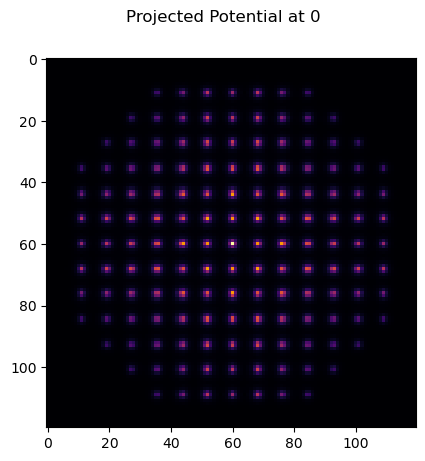

In [132]:
'''
The below cell is not graded, but you should use ax.imshow, which scans through the projected_images list using [ind]
'''
# Check if your data makes sense. I.e, ind=0 and ind=-1 should be the same!
ind = 18
fig, ax = plt.subplots()
fig.suptitle(f"Projected Potential at {tilt_angles[ind]}")
im = projected_images[ind]

ax.imshow(im, cmap="inferno")

In [128]:
grader.check("q1d")

q1d results: All test cases passed!

<!-- END QUESTION -->

We have successfully created a tomography dataset, ready for reconstruction! This example shows where using a function (`ase_to_potential`) makes sense to make your code readable, as well as where a `for`-loop is necessary to perform the task given. Unfortunately, datahub will not let me install `tomopy` (a framework for doing tomographic reconstruction). So for fun, I will also upload an additional notebook that you can put into Google Colab, which continues from where we left off in this assignment.

In the next computational assignment, you will gain more hands-on experience with building your own functions, and using `for`-loops.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [136]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q1d results: All test cases passed!
